<a href="https://colab.research.google.com/github/futurelider01/Hand-written-regression-algorithm/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [8]:
df = df.iloc[:,1:]
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000


In [48]:
df['size']=pd.to_numeric(df['size'], errors='coerce')
df['price']=pd.to_numeric(df['price'], errors='coerce')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7465 non-null   object 
 1   rooms       7465 non-null   int64  
 2   size        7465 non-null   float64
 3   level       7465 non-null   int64  
 4   max_levels  7465 non-null   int64  
 5   price       7465 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 408.2+ KB


In [49]:
df.isna().sum()

district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [50]:
df['district'].value_counts()

district
Чиланзарский         1631
Мирзо-Улугбекский    1368
Юнусабадский          877
Учтепинский           875
Мирабадский           772
Яккасарайский         650
Яшнободский           468
Шайхантахурский       374
Олмазорский           267
Сергелийский          160
Янгихаётский           15
Бектемирский            8
Name: count, dtype: int64

In [51]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [52]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7504    70.0
7522    20.0
7533    32.0
7545    70.0
7564    30.0
Name: size, Length: 1631, dtype: float64

In [53]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7504    48000.0
7522    18500.0
7533    28000.0
7545    49800.0
7564    22914.0
Name: price, Length: 1631, dtype: float64

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

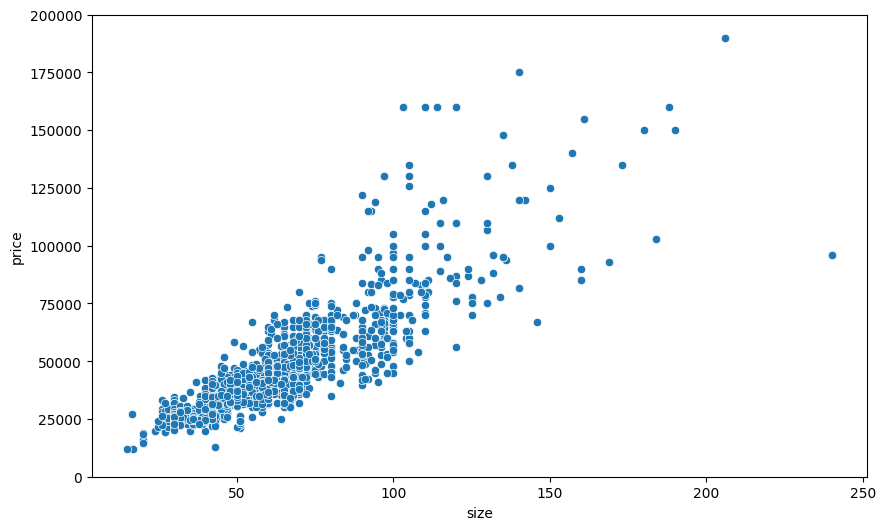

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing, x='size', y='price')
plt.ylim(0, 200000)  # Set limits according to your data
plt.show()

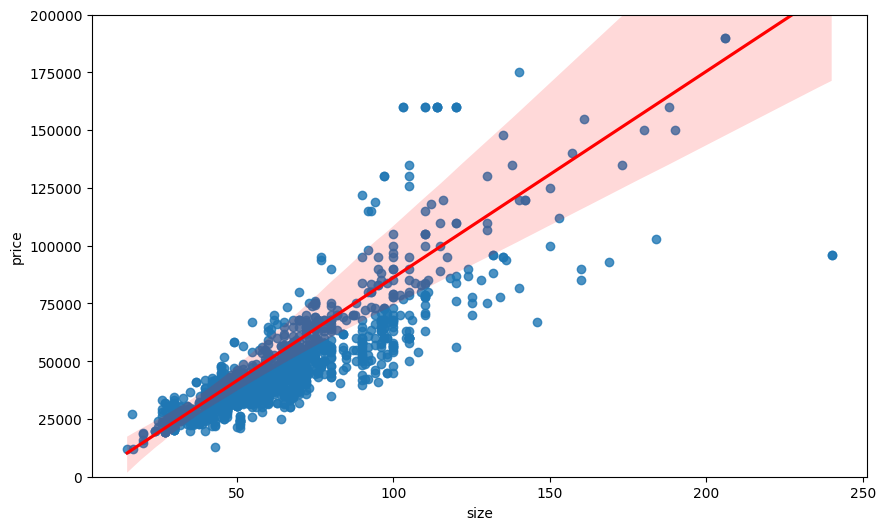

In [60]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.ylim(0, 200000)
plt.show()


In [61]:
x_mean = X.mean()
y_mean = y.mean()
x_mean, y_mean

(62.29678724708767, 52514.3225015328)

In [62]:
theta1 = np.sum((X-x_mean)*(y-y_mean))/np.sum((X-x_mean)**2)
theta1

893.2479826778085

In [63]:
theta0 = y_mean - theta1*x_mean
theta0

-3132.157034236894

In [64]:
def fit(x):
    return theta0 + theta1*x


In [71]:
sample_X = X.sample(10, random_state=42)
ids = sample_X.index
sample_X_y = y[ids]
sample_X_y, sample_X

(6319    34500.0
 5980    35500.0
 6864    27000.0
 1016    45000.0
 5166    36500.0
 1226    32000.0
 6210    32000.0
 3631    42000.0
 3240    29500.0
 953     27500.0
 Name: price, dtype: float64,
 6319    46.00
 5980    58.00
 6864    30.00
 1016    76.00
 5166    58.00
 1226    58.00
 6210    27.00
 3631    63.09
 3240    45.00
 953     36.00
 Name: size, dtype: float64)

In [74]:
y_pred = fit(sample_X)

In [73]:
def mean_squared_error(y, y_pred):
    return np.mean((y-y_pred)**2)
def mean_absolute_error(y, y_pred):
    return np.mean(np.abs(y-y_pred))


In [75]:
mse = mean_squared_error(sample_X_y, y_pred)
mae = mean_absolute_error(sample_X_y, y_pred)
mse, mae

(132010056.64374392, 9990.142747862028)